# Example: Enzyme Kinetics with Inhibitors

In this workbook we will introduce simple *Python* commands for exploring enzyme kinetics with inhibition.

So the famous Michaelis-menten equation is

$$ \nu = V_{max} \frac{[S]}{K_M + [S]} $$

## The Effect of Inhibitors

The terms $V_{max}$ and $K_M$ can be affected by the presence of inhibitors. So perhaps we should refer to the values as "observed values"; changed from the true values by inhibitors (or activators).

$$ \nu = V_{max}^{obs} \frac{[S]}{K_M^{obs} + [S]} $$

You will have learned that competitve inhibitors compete for the active site and affect the apparent affinity for the substrate but do not change the chemistry of the enzyme and so do not affect $k_{cat}$. As a result, the value for $V_{max}$ will be unchanged. In the case of a **competitive inhibitor** we observe $V_{max}$ is unchanged and that...

$$K_{M}^{obs} = K_{M}\cdot \left(1+\frac{[I]}{K_I}\right)$$

...where $K_i$ is the dissociation constant for the inhibitor and enzyme and $[I]$ is the concentration of the inhibitor.

In the case of a **non-competitve inhibitor** we observe $K_M$ is unchanged and that...

$$V_{max}^{obs} = \frac{V_{max}}{1+\frac{[I]}{K_I}}$$

These are the only two cases we will discuss in this course.

## The Inhibition Model

The model used to derive the above equations is shown below.

<img src="images/T4_scheme1.png" width=400 class=center />

In the case of competitive inhibition, the inhibitor must bind to the active site. It cannot bind to the $E\cdot S$ complex because it competes for the active site with the substrate. In this case the $K_u$ dissociation constant can be considered to be unimportant.

In the case of non-competitive inhibition, the inhibitor binds at another site and we assume that it binds to either $E$ or the $E\cdot S$ complex equally well. In that case we can say that $K_c = K_u$ and that both of these values represent $K_I$.

## Uncompetitive Inhibition

There is a third option, **uncompetitive inhibition**. In this case the inhibitor requires the presence of inhibitor to bind to the enzyme. In this case we would say that $k_c$ is unimportant and that $K_u$ is the only $K_I$ value.

In this case both $K_M$ and $V_{max}$ are affected and we observe that 

\begin{array}{cl}
V_{max}^{obs} = \frac{V_{max}}{1+\frac{[I]}{K_I}}  & K_M^{obs} = \frac{K_M}{1+\frac{[I]}{K_I}} 
\end{array}

## Mixed Inhibition

In many cases the binding of an inhibitor to an enzyme can occur in such a way that it binds to a site other than the active site and that binding is affected by the presence of substrate, but not eliminated. In this case we observe that $K_c$ and $K_u$ are importamnt and that $K_c \ne K_u$. This is the case of **mixed inhibition**. The Michaelis-menten equation can be derived in this situation...

$$ \nu = \frac{V_{max}}{1+\frac{[I]}{K_u}} \frac{[S]}{K_M\frac{1+\frac{[I]}{K_c}}{1+\frac{[I]}{K_u}} + [S]} $$

This is, in fact, the general equation. It will result in the observations of competitive, non-competitive and uncompetive inhibition if we respectively state that...

\begin{align}
k_u &= \infty \\
k_c &= k_u \\
k_c &= \infty
\end{align}



## Fun with Plotting

Let us explore the consequences for adding an inhibitor. We will observe the behaviour of the Michaelis-Menten plot and the abominable Lineweaver-Burke plot as we use competetive and non-competitive inhibitors. We can also explore uncompetitive and mixed inhibition.

The code below will plot both the MM and the LB equation for three concentrations of inhibitor. By setting the values of $V_{max}$, $K_M$, $[I]$, $K_u$ and $K_c$ we can explore all the cases above.

In [75]:
########################
## Demonstrating Inhibitors
########################

import numpy as np 
from matplotlib import pyplot as plt

data_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/data/"
image_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/images/"
image_path = "./images/"

github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
style = "S2_classic2.mplstyle"
#style = "tufte.mplstyle"

S_conc = [1,3,5,10,30,50]  ### mM
S_conc_line = np.linspace(0.1,50,100)  ### for curve in plot

Vmax = 1                 ### uM/min
KM = 5                   ### mM


##########################################################
### CHANGE THESE VALUES. Have Fun!
##########################################################

I_conc = [0,0.1,0.3]     ### uM

Kc = 0.1   ### uM     
Ku = 0.1   ### uM
#Ku = np.inf
#Kc = np.inf


##########################################################
##########################################################

I_conc = np.array(I_conc)
S_conc = np.array(S_conc)

def MMcalc(S, Vmax, KM, I, Kc, Ku):
    Vmax_app = Vmax/ (1+I/Ku)
    KM_app = KM * (1+I/Kc) / (1+I/Ku)
    v = Vmax_app * S / (S + KM_app)
    return(v, Vmax_app, KM_app)



### Michaelis-Menten Plots with Inhibition

When [I] = 0.0 uM, Vmax(app) = 1.00, KM(app) = 5.00
When [I] = 0.1 uM, Vmax(app) = 0.50, KM(app) = 5.00
When [I] = 0.3 uM, Vmax(app) = 0.25, KM(app) = 5.00
Noncompetitive, Ki = 0.1 uM


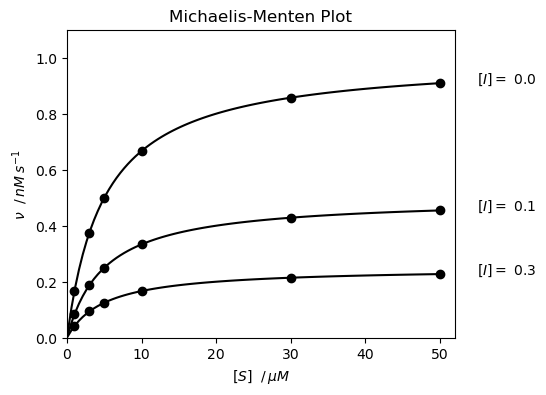

In [76]:
######################
### Create an empty plot
#####################

plt.rcdefaults()           ### Reset default style - no needed but just in case.
plt.figure(figsize=(5,4))  ### establish a figure with size 5x4

######################
### Add some style
######################

plt.ylim(0, 1.1)         ### y-axis limits are min = 0, max = whatever
plt.xlim(0, 52)         ### x-axis limits are min = 0, max = whatever

plt.ylabel(r"$\nu\ \ /\,nM\: s^{-1}$")   ### The $ indicates "math typesetting language"
plt.xlabel(r"$[S]\ \ /\,\mu M$")
plt.title("Michaelis-Menten Plot")

######################
### Plot the data for each [I]
#####################

for I in I_conc:
    rates, Vmax_app, KM_app = MMcalc(S_conc, Vmax, KM, I, Kc, Ku)
    rate_line, Vmax_app, KM_app = MMcalc(S_conc_line, Vmax, KM, I, Kc, Ku)
    
    print(f"When [I] = {I:0.1f} uM, Vmax(app) = {Vmax_app:0.2f}, KM(app) = {KM_app:0.2f}")

    x = S_conc
    y = rates
    
    x_line = S_conc_line
    y_line = rate_line
    
    plt.plot(x, y, "ko")     
    plt.plot(x_line, y_line, "k-")

    plt.text(np.max(x)+5,np.max(y),"$[I] = $ "+str(I))

if Kc == Ku:
    print(f"Noncompetitive, Ki = {Kc:0.1f} uM")
elif Ku == np.inf:
    print(f"Competitive, Ki = {Kc:0.1f} uM")
elif Kc == np.inf:
    print(f"Unompetitive, Ki = {Kc:0.1f} uM")
elif Ku != Kc:
    print(f"Mixed, Kc = {Kc:0.1f} uM, Ku = {Ku:0.1f} uM")
else:
    print("ERROR: No cases fit")



######################
### Display and export the plot
######################

#plt.savefig("MM_plot.pdf")    ### Save the image as a pdf file. Now you can use it in a document.
plt.show()





### Lineweaver-Burke Plots with Inhibition

When [I] = 0.0 uM, Vmax(app) = 1.00, KM(app) = 5.00
When [I] = 0.1 uM, Vmax(app) = 0.50, KM(app) = 5.00
When [I] = 0.3 uM, Vmax(app) = 0.25, KM(app) = 5.00
Noncompetitive, Ki = 0.1 uM


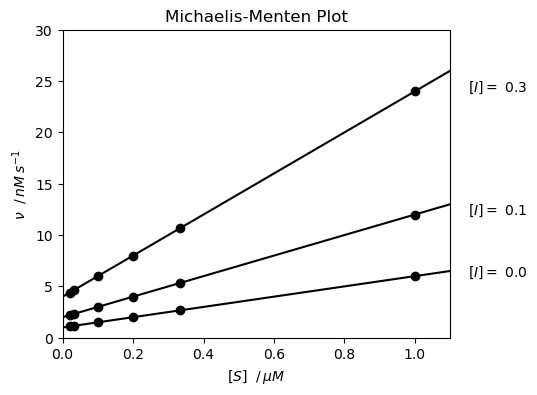

In [77]:
######################
### Create an empty plot
#####################

plt.rcdefaults()           ### Reset default style - no needed but just in case.
plt.figure(figsize=(5,4))  ### establish a figure with size 5x4

######################
### Add some style
######################

plt.ylim(0, 30)         ### y-axis limits are min = 0, max = whatever
plt.xlim(0, 1.1)         ### x-axis limits are min = 0, max = whatever

plt.ylabel(r"$\nu\ \ /\,nM\: s^{-1}$")   ### The $ indicates "math typesetting language"
plt.xlabel(r"$[S]\ \ /\,\mu M$")
plt.title("Michaelis-Menten Plot")

######################
### Plot the data for each [I]
#####################

S_conc_line = np.append(S_conc_line, 10000)

for I in I_conc:
    rates, Vmax_app, KM_app = MMcalc(S_conc, Vmax, KM, I, Kc, Ku)
    rate_line, Vmax_app, KM_app = MMcalc(S_conc_line, Vmax, KM, I, Kc, Ku)
    
    print(f"When [I] = {I:0.1f} uM, Vmax(app) = {Vmax_app:0.2f}, KM(app) = {KM_app:0.2f}")

    x = 1/S_conc
    y = 1/rates
    
    x_line = 1/S_conc_line
    y_line = 1/rate_line
    
    plt.plot(x, y, "ko")     
    plt.plot(x_line, y_line, "k-")

    plt.text(np.max(x)+.15 ,np.max(y),"$[I] = $ "+str(I))

if Kc == Ku:
    print(f"Noncompetitive, Ki = {Kc:0.1f} uM")
elif Ku == np.inf:
    print(f"Competitive, Ki = {Kc:0.1f} uM")
elif Kc == np.inf:
    print(f"Unompetitive, Ki = {Kc:0.1f} uM")
elif Ku != Kc:
    print(f"Mixed, Kc = {Kc:0.1f} uM, Ku = {Ku:0.1f} uM")
else:
    print("ERROR: No cases fit")


######################
### Display and export the plot
######################

#plt.savefig("LB_plot.pdf")    ### Save the image as a pdf file. Now you can use it in a document.
plt.show()



